<img src="Dollar.jpg" width=400 height=400 />

# Banknote Authentication

### Problem Statement: 

Our bank had a serious problem with fake banknotes. The finest banks are working on introducing security features to banknotes. These features include ultraviolet and holographic features, watermarks and metals threads, but forgeries are exploiting modern technology to recreate these features. I'm wondering if modern data science can help us to identify fake notes more efficiently so we can take them out of the general circulation quicker. We collected and digitised hundreds of images of genuine and forged banknotes. We were advised that the mathematical tool, Wavelets, can be used to extract information from many different kinds of data, including from images. The Wavelets are generally sufficient to analyze data fully. We used a Wavelet transform tool to extract features from our images. Can we find an algorithm that will identify fake banknotes?

### Possible solution: 

Using the banknote-authentication dataset available on OpenML, we can build a model that will use the Wavenets to predict the authenticity of the banknotes. The project objective is to use a KMeans algorithm to try and solve this problem. 

In [1]:
#!pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.special import comb
from itertools import combinations

C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
banknote_df = pd.read_csv('Banknote-authentication-dataset.csv') 
note_df = banknote_df.copy()

v1 = note_df['V1']
v2 = note_df['V2']
note_df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


### Describing the Dataset 
- Below we will find the: 
    - Length of the dataset 
    - Means for both V1 and V2
    - Standard deviations of V1 and V2
    - Values lowest and highest, and the median (50%). 

In [4]:
note_df_length = len(note_df)
print("\033[4mDataset Description:\033[0m")
note_df.describe()

Dataset Description:


,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


### Visualising the Dataset 
- The values of V1 and V2 will be plotted on a scattergraph for viewing. 

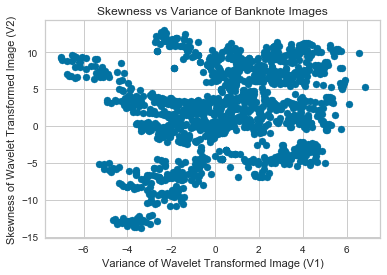

In [5]:
plt.xlabel('Variance of Wavelet Transformed Image (V1)')
plt.ylabel('Skewness of Wavelet Transformed Image (V2)' )
plt.title('Skewness vs Variance of Banknote Images')
plt.scatter(v1, v2)

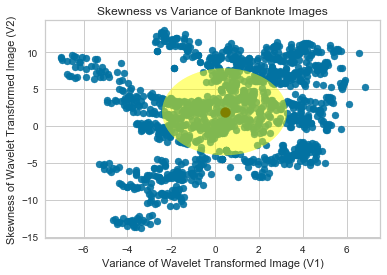

In [6]:
v1 = note_df['V1']
v2 = note_df['V2']

mean = np.mean(note_df, 0)
std_dev = np.std(note_df, 0)
ellipse = patches.Ellipse([mean[0], mean[1]], std_dev[0] * 2, std_dev[1]*2, alpha=0.5, color='yellow')

fig, graph = plt.subplots()
plt.xlabel('Variance of Wavelet Transformed Image (V1)')
plt.ylabel('Skewness of Wavelet Transformed Image (V2)' )
plt.title('Skewness vs Variance of Banknote Images')

graph.scatter(v1, v2, alpha=0.9)
graph.add_patch(ellipse)
graph.scatter(mean[0], mean[1], alpha=1, c='black', s=100)

Note: The black dot represents the mean of the dataset. The yellow represents the standard deviation around the mean. However, it can be seen there is a high degree of variance in the data. 

### Finding the Ideal Number of Clusters of the Dataset 
- Identifying the number of clusters that would best fit the data as it can indicate how well suited the model is for the data.
- In this case, the Elbow Method will be implemented. 

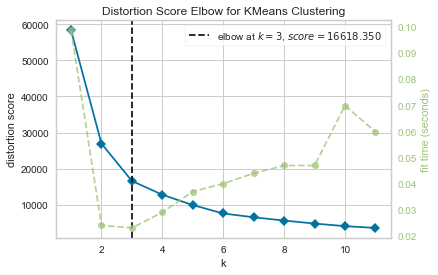

In [7]:
note_data = np.column_stack((v1, v2))
k_means = KMeans(n_clusters=2).fit(note_data)
clusters = k_means.cluster_centers_
visualizer = KElbowVisualizer(k_means, k=(1,12)).fit(note_data)
visualizer.show()

From the graph, we see that the ideal number of clusters for KMeans is 3. However, we are looking to delineate banknotes by their authenticity. Banknotes are either fake or real. It would have been best if the ideal number of clusters were 2 as this would best represent solution we are hoping to find. This may indicate that another model is best suited. Possible models include the Support Vector Machine (SVM) or logistic Regression. 

### Creating KMeans Model
- The project objective is to fit a KMeans algorithm onto the dataset and observe the results. We will be using 2 clusters in hopes to determine how well the model is able to identify real notes from fake notes. 

2 clusters have been found at: 
Point: [0.85713121 6.06625141]
Point: [-0.12411751 -3.53751287]


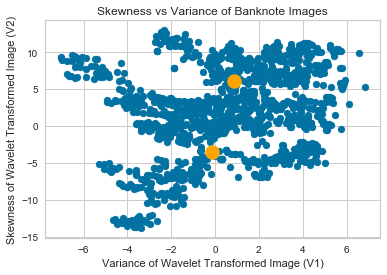

In [8]:
plt.xlabel('Variance of Wavelet Transformed Image (V1)')
plt.ylabel('Skewness of Wavelet Transformed Image (V2)' )
plt.title('Skewness vs Variance of Banknote Images')
plt.scatter(v1, v2)
plt.scatter(clusters[:, 0], clusters[:, 1], s=200, c='orange')

print("2 clusters have been found at: ")
print("Point: " + str(clusters[0]))
print("Point: " + str(clusters[1]))

### Cluster-Point Determination 
- It is important to see to which points belong to either cluster. Different colours have been used to identify the different groupings. 

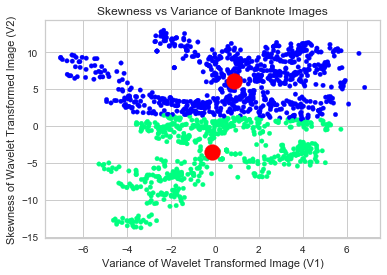

In [9]:
k_means = KMeans(n_clusters=2).fit(note_data)
clusters = k_means.cluster_centers_
clusts = k_means.fit_predict(note_data)

plt.xlabel('Variance of Wavelet Transformed Image (V1)')
plt.ylabel('Skewness of Wavelet Transformed Image (V2)' )
plt.title('Skewness vs Variance of Banknote Images')
plt.scatter(v1, v2, c=clusts, s=20, cmap='winter')
plt.scatter(k_means.cluster_centers_[:, 0],
            k_means.cluster_centers_[:, 1],
            s = 250,
            marker='o',
            c='red',
            label='centroids')

Note: As we can observe from the data, the model has roughly divided the data horizontally at y = 0.   

### Assessing the Stability of the KMeans Algorithm
- To see how reliable the model is, the model was recreated 4 times and the results were tracked. The results were then plotted on scattergraphs.

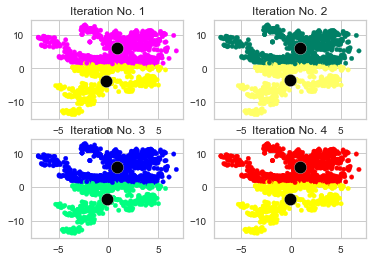

In [10]:
figure, graph = plt.subplots(2, 2)
import random

colourmaps = ['spring','summer','winter','autumn']
count = 0

for i in range(2):
    for j in range(2):
        
        k_means = KMeans(n_clusters=2).fit(note_data)
        clusters = k_means.cluster_centers_
        graph[i,j].scatter(v1, v2, c=clusts, s=20, cmap=colourmaps[count])
        graph[i,j].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
                           s = 150,
                           marker='o',
                           c='black',
                           edgecolor='white',
                           label='centroids')
        graph[i,j].set_title("Iteration No. " + str(count + 1))
        count += 1
  
plt.show()


Note: As we can see, the model has proven to be relatively stable. 

### Ground Truth Labels
- The intial dataset did not contain the class of each row of data - whether the note is 'real' or 'fake'. The complete data was found at https://www.openml.org/d/1462. 
- The dataset is relatively small, and can be quicly parsed for any errors. 
- The data was observed for any abnormalities and none were found. 

In [11]:
GT_banknote_df = pd.read_csv('Banknote Authentication GT Labels.csv') 
ground_truth_df = GT_banknote_df.copy()
ground_truth_df = ground_truth_df.sample(frac = 1) # The dataframe was shuffled
print(ground_truth_df.head())

           V1        V2       V3       V4  Class
1239 -2.44580  1.628500 -0.88541 -1.48020      2
1232 -4.12440  3.790900 -0.65320 -4.18020      2
835  -0.94255  0.039307 -0.24192  0.31593      2
527   2.53280  7.528000 -0.41929 -2.64780      1
860  -3.46050  2.690100  0.16165 -1.02240      2


In [12]:
samples = ground_truth_df.sample(n = 100)
del samples['V4']
del samples['V3']
samples.head()

,V1,V2,Class
1371,-2.54190,-0.65804,2
958,-0.36372,3.04390,2
834,-1.72630,-6.02370,2
1266,-1.43770,-1.43200,2
244,2.42870,9.38210,1


### Evaluation of the KMeans Model

In [13]:
# The model will try to predict the values from the original dataset
y_predicted = k_means.fit_predict(samples[['V1', 'V2']])
y_predicted += 1
y_predicted

array([2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1])

In [14]:
#T The class values will be retrieved from the original dataset for comparison
y_values = []
for i in range(100):
    y_values.append(int(samples.iloc[i]['Class']))

y_values = np.array(y_values)
y_values

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1])

### Accuracy of the KMeans Model

In [15]:
# The predicted values will be compared to the real values, and the score will be presented. 
count = 0
for i in range(100):
    if y_predicted[i] == samples.iloc[i]['Class']:
        count += 1
    else:
        continue

accuracy = count/len(samples)
print("The accuracy of the model is: " + str(int(accuracy * 100)) + "%")

The accuracy of the model is: 65%


### Rand Score 
- One metric used in evaluating the value of a clustering model is the Rand Index. It is used to measure the similarity of two clusters - namely the true cluster and the predicted cluster. 
- The values range from 0 to 1 - 0 being no similarity, and 1 being a perfect match. 

In [16]:
labels_true = y_predicted
labels_pred = y_values
def check_clusterings(labels_true, labels_pred):
    """Check that the two clusterings matching 1D integer arrays."""
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)    
    # input checks
    if labels_true.ndim != 1:
        raise ValueError(
            "labels_true must be 1D: shape is %r" % (labels_true.shape,))
    if labels_pred.ndim != 1:
        raise ValueError(
            "labels_pred must be 1D: shape is %r" % (labels_pred.shape,))
    if labels_true.shape != labels_pred.shape:
        raise ValueError(
            "labels_true and labels_pred must have same size, got %d and %d"
            % (labels_true.shape[0], labels_pred.shape[0]))
    return labels_true, labels_pred

def rand_score (labels_true, labels_pred):
    """given the true and predicted labels, it will return the Rand Index."""
    check_clusterings(labels_true, labels_pred)
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri
"{:.2f}".format(5)
print("The Rand Index score is {:.2f}".format(float(rand_score(labels_true, labels_pred))))

The Rand Index score is 0.54


Note: This is not a bad score, but defintitely not ideal. There may be better models for evaluating this dataset. 

## Conclusion
Overall, the model does not do a great job of distinguishing between fake and real banknotes. The accuracy of the model will, most likely, not be used for the purpose of banknote authentication. A 65% percent accuracy is not good enough, and fail to make the impact that is required. I recommend algorithms that are more suited to a more binary classification solution. More data could be required to increase the accuracy of the model. However, Support Vector Machines may be a viable solution. 

# ---------------------------------------------------------------------------------------------------------------

# Further Evaluation: 

## Logistic Regression

- Since the Kmeans algorithm as failed to be effective, we will assess the use of a Logistic Regression model. The logistic regression is a great model to use as it works well in binary classification problems. Here we are trying to determine whether a banknote is fake or real - a typical binary classification problem. 
- NOTE: Only 2 columns of data, V1 and V2, will be used.

In [17]:
from sklearn.linear_model import LogisticRegression 
x = ground_truth_df.iloc[:, [0, 1]].values
y = ground_truth_df.iloc[:, [4]].values
print(x)
print("------------")
print(y)

[[-2.4458    1.6285  ]
 [-4.1244    3.7909  ]
 [-0.94255   0.039307]
 ...
 [-2.7028    1.6327  ]
 [ 5.7353    5.2808  ]
 [-0.278     8.1881  ]]
------------
[[2]
 [2]
 [2]
 ...
 [2]
 [1]
 [1]]


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) # Split train and test set

In [19]:
#Normalization of data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [20]:
#Fitting the data onto the Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(xtrain, ytrain) 

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = lr_model.predict(xtest)
print ("Accuracy : {:.2f}%".format(accuracy_score(ytest, y_pred)*100))

Accuracy : 85.13%


## Incorporating All Available Data into Logistic Regression
- In this instance, more data will added to the model. This increases the dimensionality of the data but due to the relatively simple nature of the problem, it should work well. Here all 4 columns of available data weill be used. 

In [22]:
from sklearn.linear_model import LogisticRegression 
x_4D = ground_truth_df.iloc[:, [0, 1, 2, 3]].values
y_4D = ground_truth_df.iloc[:, [4]].values
print(x)
print("------------")
print(y)

[[-2.4458    1.6285  ]
 [-4.1244    3.7909  ]
 [-0.94255   0.039307]
 ...
 [-2.7028    1.6327  ]
 [ 5.7353    5.2808  ]
 [-0.278     8.1881  ]]
------------
[[2]
 [2]
 [2]
 ...
 [2]
 [1]
 [1]]


In [23]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_4D, y_4D, test_size = 0.25, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train4) 
x_train = sc_x.transform(x_train4)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train4, y_train4)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [26]:
from sklearn.metrics import accuracy_score

y_pred4 = classifier.predict(x_test4)
print ("Accuracy : {:.2f}%".format(accuracy_score(y_test4, y_pred4)*100))

Accuracy : 97.96%


## Support Vector Machine
- The Support Vector Machines (SVM) works well on classification problems. It will delineate two clusters of data into two distinct groups. The SVM will be able to handle the binary classification problem of determining banknote authenticity.
- NOTE: Only 2 columns of data, V1 and V2, will be used.

In [27]:
from sklearn.svm import SVC 
svm1 = SVC(kernel ='rbf')
svm1.fit(xtrain, np.array(ytrain))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
y_pred = svm1.predict(xtest)
print ("Accuracy : {:.2f}%".format(accuracy_score(ytest, y_pred)*100))

Accuracy : 90.96%


## Incorporating All Available Data into Support Vector Machine

In [31]:
from sklearn.svm import SVC 
svm1 = SVC(kernel ='rbf')
svm1.fit(x_train4, np.array(y_train4))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [32]:
y_pred4 = svm1.predict(x_test4)
print ("Accuracy : {:.2f}%".format(accuracy_score(y_test4, y_pred4)*100))

Accuracy : 100.00%


# Final Conclusion

In the final assessment of model performance, the clear winner is the Support Vector Machine model with 100%. The increase in the dimensionality of the data did not hinder the effectiveness of the algorithm. I would recommend the SVM model for the detection of bank note authenticity, as it provides great success. 